# HW3 Starter Code


Remember, the authoritative instructions are on the course website:

http://www.cs.tufts.edu/comp/135/2019s/hw3.html


Please report any questions to Piazza.

# Import required libraries

In [192]:
import os
import numpy as np
import pandas as pd

import sklearn.linear_model
import sklearn.tree
import sklearn.metrics

from matplotlib import pyplot as plt
import seaborn as sns

# Starter code students need to edit

In [193]:
def calc_TP_TN_FP_FN(ytrue_N, yhat_N):
    ''' Compute counts of four possible outcomes of a binary classifier for evaluation.
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yhat_N : 1D array of floats
        Each entry represents a predicted binary value (either 0 or 1).
        One entry per example in current dataset.
        Needs to be same size as ytrue_N.

    Returns
    -------
    TP : float
        Number of true positives
    TN : float
        Number of true negatives
    FP : float
        Number of false positives
    FN : float
        Number of false negatives
    '''
    TP = 0.0
    TN = 0.0
    FP = 0.0
    FN = 0.0
    for i in range(len(yhat_N)): 
        if yhat_N[i] == 0 and ytrue_N[i] == 0:
            TN += 1
        elif yhat_N[i] == 0 and ytrue_N[i] == 1:
            FN += 1
        elif yhat_N[i] == 1 and ytrue_N[i] == 0:
            FP += 1
        elif yhat_N[i] == 1 and ytrue_N[i] == 1:
            TP += 1
    return TP, TN, FP, FN

# Starter code that should be used as is.

No need to edit these functions!

In [194]:
def calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh):
    ''' Compute performance metrics for a given probabilistic classifier and threshold
    '''
    tp, tn, fp, fn = calc_TP_TN_FP_FN(ytrue_N, yproba1_N >= thresh)
    ## Compute ACC, TPR, TNR, etc.
    acc = (tp + tn) / float(tp + tn + fp + fn + 1e-10)
    tpr = tp / float(tp + fn + 1e-10)
    tnr = tn / float(fp + tn + 1e-10)
    ppv = tp / float(tp + fp + 1e-10)
    npv = tn / float(tn + fn + 1e-10)
    
    return acc, tpr, tnr, ppv, npv

def print_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh):
    ''' Pretty print perf. metrics for a given probabilistic classifier and threshold
    '''
    acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh)
    
    ## Pretty print the results
    print("%.3f ACC" % acc)
    print("%.3f TPR" % tpr)
    print("%.3f TNR" % tnr)
    print("%.3f PPV" % ppv) # Positive predictive val
    print("%.3f NPV" % npv) # Negative predictive value

In [195]:
def calc_confusion_matrix_for_threshold(ytrue_N, yproba1_N, thresh):
    ''' Compute the confusion matrix for a given probabilistic classifier and threshold
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh

    Returns
    -------
    cm_df : Pandas DataFrame
        Can be printed like print(cm_df) to easily display results
    '''
    cm = sklearn.metrics.confusion_matrix(ytrue_N, yproba1_N >= thresh)
    cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'True'
    return cm_df

In [196]:
def compute_perf_metrics_across_thresholds(ytrue_N, yproba1_N, thresh_grid=None):
    ''' Compute common binary classifier performance metrics across many thresholds
    
    If no array of thresholds is provided, will use all 'unique' values
    in the yproba1_N array to define all possible thresholds with different performance.
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset

    Returns
    -------
    thresh_grid : 1D array of floats
        One entry for each possible threshold
    perf_dict : dict, with key, value pairs:
        * 'acc' : 1D array of accuracy values (one per threshold)
        * 'ppv' : 1D array of positive predictive values (one per threshold)
        * 'npv' : 1D array of negative predictive values (one per threshold)
        * 'tpr' : 1D array of true positive rates (one per threshold)
        * 'tnr' : 1D array of true negative rates (one per threshold)
    '''
    if thresh_grid is None:
        bin_edges = np.linspace(0, 1.001, 21)
        thresh_grid = np.sort(np.hstack([bin_edges, np.unique(yproba1_N)]))
    tpr_grid = np.zeros_like(thresh_grid)
    tnr_grid = np.zeros_like(thresh_grid)
    ppv_grid = np.zeros_like(thresh_grid)
    npv_grid = np.zeros_like(thresh_grid)
    acc_grid = np.zeros_like(thresh_grid)
    for tt, thresh in enumerate(thresh_grid):
        # Apply specific threshold to convert probas into hard binary values (0 or 1)
        # Then count number of true positives, true negatives, etc.
        # Then compute metrics like accuracy and true positive rate
        acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh)
        acc_grid[tt] = acc
        tpr_grid[tt] = tpr
        tnr_grid[tt] = tnr
        ppv_grid[tt] = ppv
        npv_grid[tt] = npv
    return thresh_grid, dict(
        acc=acc_grid,
        tpr=tpr_grid,
        tnr=tnr_grid,
        ppv=ppv_grid,
        npv=npv_grid)

def make_plot_perf_vs_threshold(ytrue_N, yproba1_N, bin_edges=np.linspace(0, 1, 21)):
    ''' Make pretty plot of binary classifier performance as threshold increases
    
    Produces a plot with 3 rows:
    * top row: hist of predicted probabilities for negative examples (shaded red)
    * middle row: hist of predicted probabilities for positive examples (shaded blue)
    * bottom row: line plots of metrics that require hard decisions (ACC, TPR, TNR, etc.)
    '''
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))
    sns.distplot(
        yproba1_N[ytrue_N == 0],
        color='r', bins=bin_edges, kde=False, rug=True, ax=axes[0]);
    sns.distplot(
        yproba1_N[ytrue_N == 1],
        color='b', bins=bin_edges, kde=False, rug=True, ax=axes[1]);

    thresh_grid, perf_grid = compute_perf_metrics_across_thresholds(ytrue_N, yproba1_N)
    axes[2].plot(thresh_grid, perf_grid['acc'], 'k-', label='accuracy')
    axes[2].plot(thresh_grid, perf_grid['tpr'], 'b-', label='TPR (recall/sensitivity)')
    axes[2].plot(thresh_grid, perf_grid['tnr'], 'g-', label='TNR (specificity)')
    axes[2].plot(thresh_grid, perf_grid['ppv'], 'c-', label='PPV (precision)')
    axes[2].plot(thresh_grid, perf_grid['npv'], 'm-', label='NPV')
    
    axes[2].legend()
    axes[2].set_ylim([0, 1])

# Problem 1: Binary Classifier for Cancer-Risk Screening

### Load the dataset

In [197]:
# Load 3 feature version of x arrays
x_tr_M3 = np.loadtxt('data_cancer/x_train.csv', delimiter=',', skiprows=1)
x_va_N3 = np.loadtxt('data_cancer/x_valid.csv', delimiter=',', skiprows=1)
x_te_N3 = np.loadtxt('data_cancer/x_test.csv', delimiter=',', skiprows=1)

# 2 feature version of x arrays
x_tr_M2 = x_tr_M3[:, :2].copy()
x_va_N2 = x_va_N3[:, :2].copy()
x_te_N2 = x_te_N3[:, :2].copy()

In [198]:
y_tr_M = np.loadtxt('data_cancer/y_train.csv', delimiter=',', skiprows=1)
y_va_N = np.loadtxt('data_cancer/y_valid.csv', delimiter=',', skiprows=1)
y_te_N = np.loadtxt('data_cancer/y_test.csv', delimiter=',', skiprows=1)

## Problem 1a: Data Exploration

### **1a(i):** What fraction of the provided patients have cancer in the training set, the validation set, and the test set? 

In [199]:
train_frac = np.count_nonzero(y_tr_M)/len(y_tr_M)
valid_frac = np.count_nonzero(y_va_N)/len(y_va_N)
test_frac = np.count_nonzero(y_te_N)/len(y_te_N)
print("frac has_cancer on TRAIN: %.3f" % train_frac) # TODO edit the printed values
print("frac has_cancer on VALID: %.3f" % valid_frac) 
print("frac has_cancer on TEST : %.3f" % test_frac)

frac has_cancer on TRAIN: 0.141
frac has_cancer on VALID: 0.139
frac has_cancer on TEST : 0.139


### **1a(ii):** Looking at the features data contained in the training set 𝑥 array, what feature preprocessing (if any) would you recommend to improve a decision tree's performance?

**Answer**: Decision tree data usually does not require significant preprocessing. However, to optimize performance we can combine certain features or classes of data, assuming that they are related and that we know this relationship. For example, if there exists features A,B,C where features B,C are subsets or derived features of A, we can combine all three features into one (say A'). This reduces the computation needed and can result in better performance 

### 1a(iii): Looking at the features data contained in the training set 𝑥 array, what feature preprocessing (if any) would you recommend to improve logistic regression's performance?

**Answer**: We can increase the performance by scaling the features in the training set data. 

## Problem 1b: The predict-0-always baseline

### Problem 1b(i): Compute the accuracy of the predict-0-always classifier on validation and test set

In [200]:
predict_0_va = np.full((1,len(y_va_N)), 0)
predict_0_te = np.full((1,len(y_te_N)), 0)
TP_va, TN_va, FP_va, FN_va = calc_TP_TN_FP_FN(predict_0_va.flatten(), y_va_N)
TP_te, TN_te, FP_te, FN_te = calc_TP_TN_FP_FN(predict_0_te.flatten(), y_te_N)
acc_va = (TP_va + TN_va)/len(y_va_N)
acc_te = (TP_te + TN_te)/len(y_te_N)
print("acc on VALID: %.3f" % acc_va) # TODO edit values!
print("acc on TEST : %.3f" % acc_te)

acc on VALID: 0.861
acc on TEST : 0.861


### Problem 1b(ii): Print a confusion matrix for predict-0-always on the validation set.

In [201]:
# TODO call print(calc_confusion_matrix_for_threshold(...))
print(calc_confusion_matrix_for_threshold(y_va_N, predict_0_va.flatten(), 0.5))


Predicted    0  1
True             
0          155  0
1           25  0


### Problem 1b(iii): This classifier gets pretty good accuracy! Why wouldn't we want to use it?

**Answer**: This accuracy is biased towards this sample, i.e: If we have another sample where it is all 1s, we would have an accuracy of 0%, and as a result, is sample-dependent. There is no predictive power that varies between different samples which will not allow us to make meaningful predictions

### Problem 1b(iv): For the intended application (screening patients before biopsy), describe the possible mistakes the classifier can make in task-specific terms. What costs does each mistake entail (lost time? lost money? life-threatening harm?). How do you recommend evaluating the classifier to be mindful of these costs?


**Answer**: For an always-0 predictor, the possible mistake is a False Negative where the classifier predicts that a patient does not have cancer while they actually do. This has potentially life-threatening consequences. In order to have a better set of evaluations, we also need to look at other metricts such as Positive/Negative Predictive value. A PPV test would also show that this model has a lower 

## 1c : Logistic Regression

### Model Fitting for 1c(i)

In [202]:
C_grid = np.logspace(-9, 6, 31)

tr_loss_list = list()
va_loss_list = list()
for C in C_grid:
    lr = sklearn.linear_model.LogisticRegression(C=C)
    lr.fit(x_tr_M2, y_tr_M)
    y_tr_predict = lr.predict_proba(x_tr_M2)[:,1]
    tr_loss_list.append(sklearn.metrics.log_loss(y_tr_M, y_tr_predict))
    y_va_predict = lr.predict_proba(x_va_N2)[:,1]
    va_loss_list.append(sklearn.metrics.log_loss(y_va_N, y_va_predict))
    # TODO fit, predict_proba, and evaluate logistic loss
# print(tr_loss_list)

    
# Record the best model here
print(C_grid[np.argmin(va_loss_list)])

31.622776601683793


### **1c(i):** Apply your logistic regression code to the "2 feature" $x$ data, and make a plot of logistic loss (y-axis) vs. C (x-axis) on the training set and validation set. Which value of $C$ do you prefer? 

best C for LR with 2 feature data: 31.623


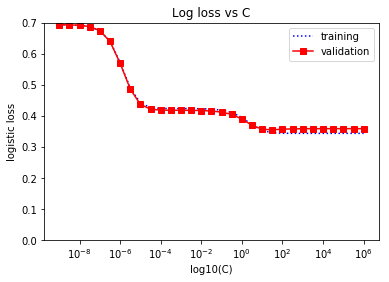

In [203]:
# TODO make plot
plt.plot(C_grid, tr_loss_list, 'b:', label = 'training')
plt.plot(C_grid, va_loss_list, 'rs-', label = 'validation')
plt.xlabel('log10(C)')
plt.xscale('log')
plt.ylabel('logistic loss')
plt.ylim([0.0, 0.7]);
plt.legend()
plt.title('Log loss vs C')

# TODO add legend
# fig_h, lin_reg = plt.subplots(nrows=1, ncols=1, sharex=True)
# lin_reg.plot(degree_list,err_tr_list, 'b:', label = "training")
# lin_reg.plot(degree_list,err_va_list, 'rs-', label = "validation")
# lin_reg.set_ylim([0,70])
# lin_reg.set_xlabel('Degree D')
# lin_reg.set_ylabel('MSE')

# print(err_tr_list)
# print(err_va_list)
#plt.legend(...);

print("best C for LR with 2 feature data: %.3f" % C_grid[np.argmin(va_loss_list)]) # TODO


### **1c(ii):** Make a performance plot that shows how good your probabilistic predictions from the best 1c(i) classifier are on the validation set. 

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


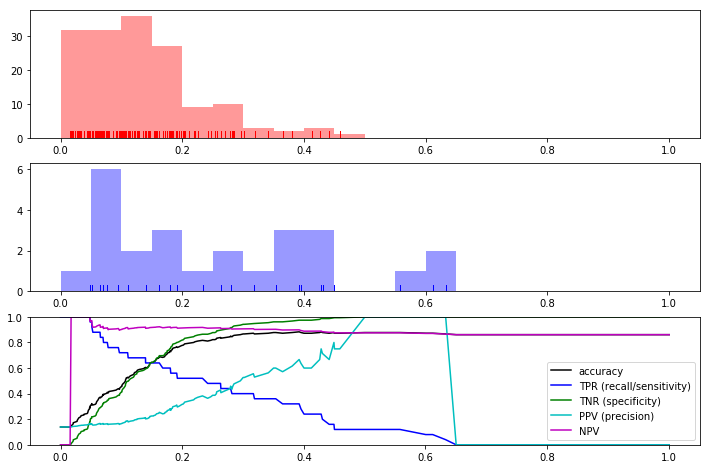

In [205]:
# TODO call make_plot_perf_vs_threshold(...)
lr = sklearn.linear_model.LogisticRegression(C=C_grid[np.argmin(va_loss_list)])
lr.fit(x_tr_M2, y_tr_M)
y_va_pred = lr.predict_proba(x_va_N2)[:,1]
make_plot_perf_vs_threshold(y_va_N, y_va_pred)

### Model fitting for 1c(iii)

In [206]:
# TODO like 1c(i) but with 3 features
C_grid = np.logspace(-9, 6, 31)

tr_loss_list = list()
va_loss_list = list()
for C in C_grid:
    lr = sklearn.linear_model.LogisticRegression(C=C)
    lr.fit(x_tr_M3, y_tr_M)
    y_tr_predict = lr.predict_proba(x_tr_M3)[:,1]
    tr_loss_list.append(sklearn.metrics.log_loss(y_tr_M, y_tr_predict))
    y_va_predict = lr.predict_proba(x_va_N3)[:,1]
    va_loss_list.append(sklearn.metrics.log_loss(y_va_N, y_va_predict))
    # TODO fit, predict_proba, and evaluate logistic loss
# print(tr_loss_list)
print(C_grid[np.argmin(va_loss_list)])
# print(C_grid)
    
# Record the best model here

1000000.0


### **1c(iii):** Plot of logistic loss (y-axis) vs. C (x-axis) on the training set and validation set. Which value of $C$ do you prefer? 

best C for LR with 3 feature data: 1000000.000


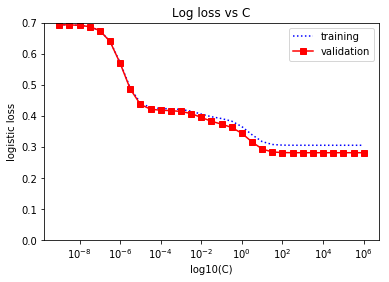

In [208]:
# TODO make plot
plt.plot(C_grid, tr_loss_list, 'b:', label = 'training')
plt.plot(C_grid, va_loss_list, 'rs-', label = 'validation')
plt.xlabel('log10(C)');
plt.xscale('log')
plt.ylabel('logistic loss');
plt.ylim([0.0, 0.7]);
plt.legend()
plt.title('Log loss vs C')

# TODO add legend
#plt.legend(...);

print("best C for LR with 3 feature data: %.3f" % C_grid[np.argmin(va_loss_list)]) # TODO


### Problem 1c(iv):  Make a performance plot that shows how good your probabilistic predictions from the best 1c(iii) classifier are on the validation set.  

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


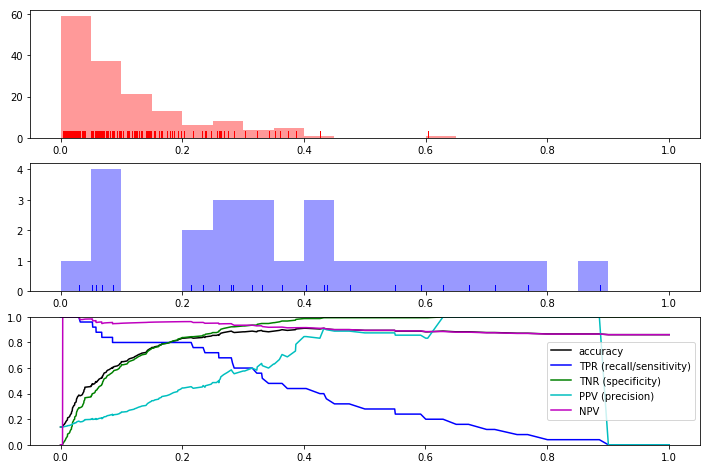

In [209]:
# TODO call make_plot_perf_vs_threshold(...)
lr = sklearn.linear_model.LogisticRegression(C=C_grid[np.argmin(va_loss_list)])
lr.fit(x_tr_M3, y_tr_M)
y_va_pred = lr.predict_proba(x_va_N3)[:,1]
make_plot_perf_vs_threshold(y_va_N, y_va_pred)

## Problem 1d: Decision Tree

### Model fitting code for decision tree 1d(i)

In [210]:
min_samples_leaf_grid = np.asarray([1, 2, 5, 10, 20, 50, 100, 200, y_tr_M.size])

tr_loss_list = list()
va_loss_list = list()
for min_samples_leaf in min_samples_leaf_grid:
    tree = sklearn.tree.DecisionTreeClassifier(
        criterion='entropy', min_samples_leaf=min_samples_leaf)
    tree.fit(x_tr_M3, y_tr_M)
    tree_tr_predict = tree.predict_proba(x_tr_M3)[:,1]
    tr_loss_list.append(sklearn.metrics.log_loss(y_tr_M, tree_tr_predict))
    tree_va_predict = tree.predict_proba(x_va_N3)[:,1]
    va_loss_list.append(sklearn.metrics.log_loss(y_va_N, tree_va_predict))

    # TODO fit, predict_proba, and compute logistic loss

# TODO compute best value for min_samples_leaf
# Use 100
# print(tr_loss_list)
# print(va_loss_list)
print(min_samples_leaf_grid[np.argmin(va_loss_list)])

100


### **1d(i):** Plot of logistic loss (y-axis) vs. min_samples_leaf (x-axis) on the training set and validation set. Which value of min_samples_leaf do you prefer? 

best min_samples_leaf with 3 feature data: 100.000


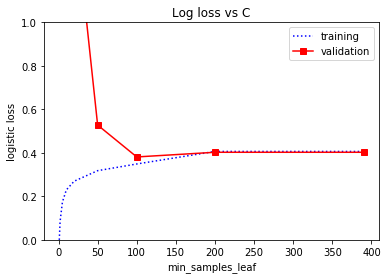

In [212]:
# TODO plot
plt.plot(min_samples_leaf_grid, tr_loss_list, 'b:', label = 'training')
plt.plot(min_samples_leaf_grid, va_loss_list, 'rs-', label = 'validation')
plt.xlabel('log10(C)');
plt.xlabel('min_samples_leaf');
plt.ylabel('logistic loss');
plt.ylim([0.0, 1.0]);
plt.legend()
plt.title('Log loss vs C')


print("best min_samples_leaf with 3 feature data: %.3f" % min_samples_leaf_grid[np.argmin(va_loss_list)]) # TODO

###  **1d(ii):** Make a performance plot that shows how good your probabilistic predictions from the best 1c(iii) classifier are on the validation set. 

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


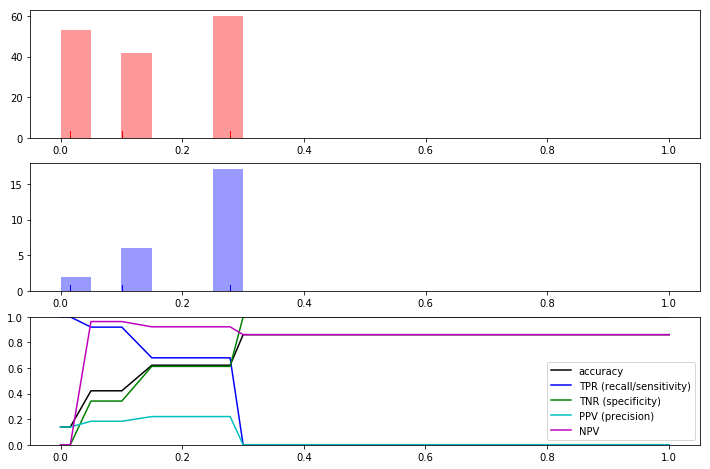

In [213]:
# TODO call make_plot_perf_vs_threshold
tree = sklearn.tree.DecisionTreeClassifier(
        criterion='entropy', min_samples_leaf=100)
tree.fit(x_tr_M3, y_tr_M)
tree_va_predict = tree.predict_proba(x_va_N3)[:,1]
make_plot_perf_vs_threshold(y_va_N, tree_va_predict)

# Problem 1e: ROC Curve analysis

### Problem 1e(i): ROC on Validation set

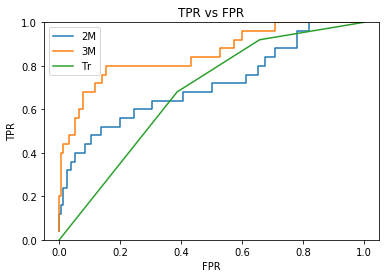

In [214]:
# TODO something like: fpr, tpr, thr = sklearn.metrics.roc_curve(...)
lr_2M = sklearn.linear_model.LogisticRegression(C=31.622776601683793)
lr_2M.fit(x_tr_M2, y_tr_M)
y_va_2M_predict = lr_2M.predict_proba(x_va_N2)[:,1]

lr_3M = sklearn.linear_model.LogisticRegression(C=1000000.0)
lr_3M.fit(x_tr_M3, y_tr_M)
y_va_3M_predict = lr_3M.predict_proba(x_va_N3)[:,1]

tree = sklearn.tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=100)
tree.fit(x_tr_M3, y_tr_M)
tree_va_predict = tree.predict_proba(x_va_N3)[:,1]

fpr_2M, tpr_2M, thres_2M = sklearn.metrics.roc_curve(y_va_N, y_va_2M_predict)
fpr_3M, tpr_3M, thres_3M = sklearn.metrics.roc_curve(y_va_N, y_va_3M_predict)
fpr_tr, tpr_tr, thres_tr = sklearn.metrics.roc_curve(y_va_N, tree_va_predict) 

plt.plot(fpr_2M, tpr_2M, label = '2M')
plt.plot(fpr_3M, tpr_3M, label = '3M')
plt.plot(fpr_tr, tpr_tr, label = 'Tr')
plt.legend()
plt.title('TPR vs FPR')
plt.ylim([0, 1]);
plt.xlabel("FPR");
plt.ylabel("TPR");

### Problem 1e(ii): ROC on Test set

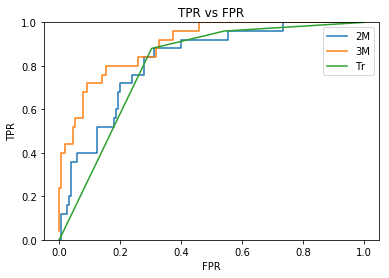

In [215]:
# TODO something like: fpr, tpr, thr = sklearn.metrics.roc_curve(...)
lr_2M = sklearn.linear_model.LogisticRegression(C=31.622776601683793)
lr_2M.fit(x_tr_M2, y_tr_M)
y_te_2M_predict = lr_2M.predict_proba(x_te_N2)[:,1]

lr_3M = sklearn.linear_model.LogisticRegression(C=1000000.0)
lr_3M.fit(x_tr_M3, y_tr_M)
y_te_3M_predict = lr_3M.predict_proba(x_te_N3)[:,1]

tree = sklearn.tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=100)
tree.fit(x_tr_M3, y_tr_M)
tree_te_predict = tree.predict_proba(x_te_N3)[:,1]

fpr_2M, tpr_2M, thres_2M = sklearn.metrics.roc_curve(y_te_N, y_te_2M_predict)
fpr_3M, tpr_3M, thres_3M = sklearn.metrics.roc_curve(y_te_N, y_te_3M_predict)
fpr_tr, tpr_tr, thres_tr = sklearn.metrics.roc_curve(y_te_N, tree_te_predict) 

plt.plot(fpr_2M, tpr_2M, label = '2M')
plt.plot(fpr_3M, tpr_3M, label = '3M')
plt.plot(fpr_tr, tpr_tr, label = 'Tr')

plt.legend()
plt.title('TPR vs FPR')
plt.ylim([0, 1]);
plt.xlabel("FPR");
plt.ylabel("TPR");

### **1e(iii):** Short Answer: Compare the 3-feature LR to 2-feature LR models: does one dominate the other in terms of ROC performance?


**Answer**: The 3-Feature LR dominates the 2-feature LR at all values of of FPR and TPR. 

### **1e(iv):** Short Answer: Compare the 3-feature DTree to 2-feature LR models: does one dominate the other in terms of ROC performance?


**Answer**: IN the validation set, the 3-Feature DTree has better performance over the 2-Feature LR model from FPR ranges between 0.35 and 0.80 and 2-Feature LR performs better between FPR values 0.00 to 0.35 and 0.80 to 1.00. For the test set, the 3-Feature DTree only consistently outperforms 2-Feature LR between FPR values of 0.30 to 0.55, at other ranges, 2-Feature LR performs better most of the time. 

## Problem 1f: Selecting a decision threshold

### Problem 1f(i): Use default 0.5 threshold. Report perf. for 3-feature Logistic Regr.

In [216]:
best_thr = 0.5

print("ON THE VALIDATION SET:")
print("Chosen best thr = %.4f" % best_thr)
print("")
print("ON THE TEST SET:")
# TODO: print(calc_confusion_matrix_for_threshold(...))
print(calc_confusion_matrix_for_threshold(y_te_N, y_te_3M_predict, best_thr))
print("")
# TODO: print(print_perf_metrics_for_threshold(...))
print_perf_metrics_for_threshold(y_te_N, y_te_3M_predict, best_thr)

ON THE VALIDATION SET:
Chosen best thr = 0.5000

ON THE TEST SET:
Predicted    0   1
True              
0          152   3
1           15  10

0.900 ACC
0.400 TPR
0.981 TNR
0.769 PPV
0.910 NPV


### Problem 1f(ii): Pick threshold to maximize TPR s.t. PPV >= 0.98. Report perf. for 3-feature Logistic Regr.

In [217]:
thresh = [0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69,0.7,0.9,1.0]

chosen_thres = 0.61

print("ON THE VALIDATION SET:")
print("Chosen best thr = %.4f" % chosen_thres) # TODO
print("")
print("ON THE TEST SET:")
# TODO: print(calc_confusion_matrix_for_threshold(...))
print(calc_confusion_matrix_for_threshold(y_te_N, y_te_3M_predict, chosen_thres))
print("")
# TODO: print(print_perf_metrics_for_threshold(...))
print_perf_metrics_for_threshold(y_te_N, y_te_3M_predict, chosen_thres)

# for t in thresh: 
#     print(t)
#     print_perf_metrics_for_threshold(y_va_N, y_va_3M_predict, t)
    
#Based on the thresholds calculated, thresh = 0.595 seems to provide the max value of TPR at 0.240 while PPV >= 0.98.
    

ON THE VALIDATION SET:
Chosen best thr = 0.6100

ON THE TEST SET:
Predicted    0  1
True             
0          155  0
1           19  6

0.894 ACC
0.240 TPR
1.000 TNR
1.000 PPV
0.891 NPV


### Problem 1f(iii): Pick threshold to maximize PPV s.t. TPR >= 0.98. Report perf. for 3-feature Logistic Regr.

In [218]:
# TODO thresh_grid, perf_grid = compute_perf_metrics_across_thresholds(...)

# TODO Find threshold that makes TPR as large as possible, while satisfying PPV >= 0.98

max_ppv = 0.03

print("ON THE VALIDATION SET:")
print("Chosen best thr = %.4f" % max_ppv) # TODO
print("")
print("ON THE TEST SET:")
# TODO: print(calc_confusion_matrix_for_threshold(...))
print(calc_confusion_matrix_for_threshold(y_te_N, y_te_3M_predict, max_ppv))
print("")
# TODO: print(print_perf_metrics_for_threshold(...))
print_perf_metrics_for_threshold(y_te_N, y_te_3M_predict, max_ppv)

thresh = [0.0029,0.03, 0.0301,0.031]

# for t in thresh: 
#     print(t)
#     print_perf_metrics_for_threshold(y_va_N, y_va_3M_predict, t)

ON THE VALIDATION SET:
Chosen best thr = 0.0300

ON THE TEST SET:
Predicted   0   1
True             
0          57  98
1           0  25

0.456 ACC
1.000 TPR
0.368 TNR
0.203 PPV
1.000 NPV


### Problem 1f(iv): Compare the confusion matrices between 1f(i) - 1f(iii). Which thresholding strategy best meets our preferences from 1a: avoid life-threatening mistakes at all costs, while also eliminating unnecessary biopsies?

**Answer**: The third thresholding strategy (fiii) that maximizes PPV. Based on our preferences, this avoids all life-threatening cases of False Negative predictions as compared to strategies in f(i), and f(ii). Although it requires more unecessary biopsies to be performed than f(i) and f(ii), the total number of biopsies that are performed has reduced from 155 to 98 (roughly a 33% reduction).

### Problem 1f(v): How many subjects in the test set are saved from unnecessary biopsies using your selected thresholding strategy? What fraction of current biopsies would be avoided if this classifier was adopted by the hospital?

**Answer**: The number of subjects saved from unnecessary biopsies is 57. The fraction avoided is 57/155

# Problem 2: Concept Questions

## Problem 2a: Optimization

### 2a(i): Where is the ideal minimum of the function $f(x)$?


Ideal minimum is at x = 0, where f(x) = 0

### 2a(ii): Does this gradient descent procedure converge? Explain your answer.M

This procedure does not converge as it will eventually bounce back and forth using the x-values -0.1 and 0.1. The ideal minimum of x cannot be reached using the this step size at the chosen starting point.


### 2a(iii): Can you propose a step length with which the optimization procedure converges?

Based off of the value of f(x), we cannot simply provide a constant step length where the gradient eventually converges to 0 as we cannot find the gradient of f(x) at f(x) = 0. Other diminishing step methods such as Newton's algo would also not work in this instance. 

There are, however, alternate methods to approximate the gradient close to f(x) = 0 which can be achieved by using **subgradient methods** to suggest diminishing step lengths.

## Problem 2b: Understanding Logistic Regression

### 2b(i): Explain why the illustration has problems (1-3 sentences).

Logistic regression finds a set of weights w and biases b that will be plugged in for x values to predict y hat. By nature, the regression boundary should then be a straight line. However, the graph shows a sigmoid curve, which should instead represent the logistic sigmoid function not the logistic regression graph
